In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
wine=datasets.load_wine()
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df['wine type']=wine.target
df.head() # class 0, class 1, class 2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df['wine type'].unique()

array([0, 1, 2])

In [ ]:
len(df['wine type'].unique())

3

In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
wine_scaled=SS.fit_transform(wine.data)

In [ ]:
input=wine_scaled
output=df['wine type']

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input,output)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(train_input, train_output)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(test_input,test_output)

0.9555555555555556

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn2= KNeighborsClassifier(n_neighbors=2)
knn3= KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(train_input,train_output)
knn2.fit(train_input,train_output)
knn3.fit(train_input,train_output)

KNeighborsClassifier()

In [ ]:
knn.score(test_input,test_output), knn.score(train_input,train_output) #K=3

(0.9555555555555556, 0.9624060150375939)

In [ ]:
knn2.score(test_input,test_output), knn2.score(train_input,train_output) #K=2

(0.9333333333333333, 0.9849624060150376)

In [ ]:
knn3.score(test_input,test_output), knn3.score(train_input,train_output) #K=5

(0.9777777777777777, 0.9849624060150376)

In [ ]:
# best K value
acc_test=[]
acc_train=[]
for i in range(1, 100):
  knn_k=KNeighborsClassifier(n_neighbors=i)
  knn_k.fit(train_input,train_output)
  acc_test.append(knn_k.score(test_input,test_output))
  acc_train.append(knn_k.score(train_input,train_output))

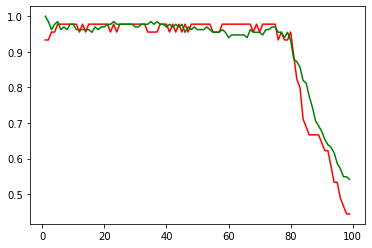

In [ ]:
plt.plot(range(1,100),acc_test,'r')
plt.plot(range(1,100),acc_train,'g')

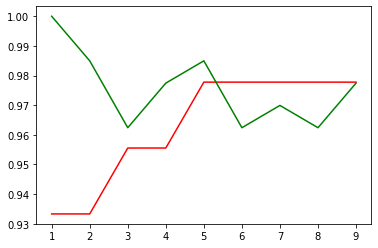

In [ ]:
plt.plot(range(1,10),acc_test[0:9],'r')
plt.plot(range(1,10),acc_train[0:9],'g')